Project: Analyzing Walmart Store Sales Data

In [1]:
##Objective
##Analyze sales trends, identify key drivers of sales, and evaluate the impact of holidays, temperature, fuel prices, and unemployment rates on sales.

Step First -Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load and Explore the Data

In [3]:
data=pd.read_csv("Walmart.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Step 3: Data Cleaning

In [9]:
# Convert date column into datatime

data['Date']= pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [10]:
# Check for missing values and fill them if necessary

data.fillna(method='ffill',inplace=True)

C:\Users\thaku\AppData\Local\Temp\ipykernel_7180\2466040372.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


Step 4: Data Aggregation

In [12]:
# Aggregate total weekly sales by store
store_sales=data.groupby('Store')['Weekly_Sales'].sum().reset_index()
print(store_sales)

    Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813

In [15]:
# Aggregate holiday vs non-holiday sales

holiday_sales=data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
print(holiday_sales)

   Holiday_Flag  Weekly_Sales
0             0  1.041256e+06
1             1  1.122888e+06


Step 5: Exploratory Data Analysis (EDA)

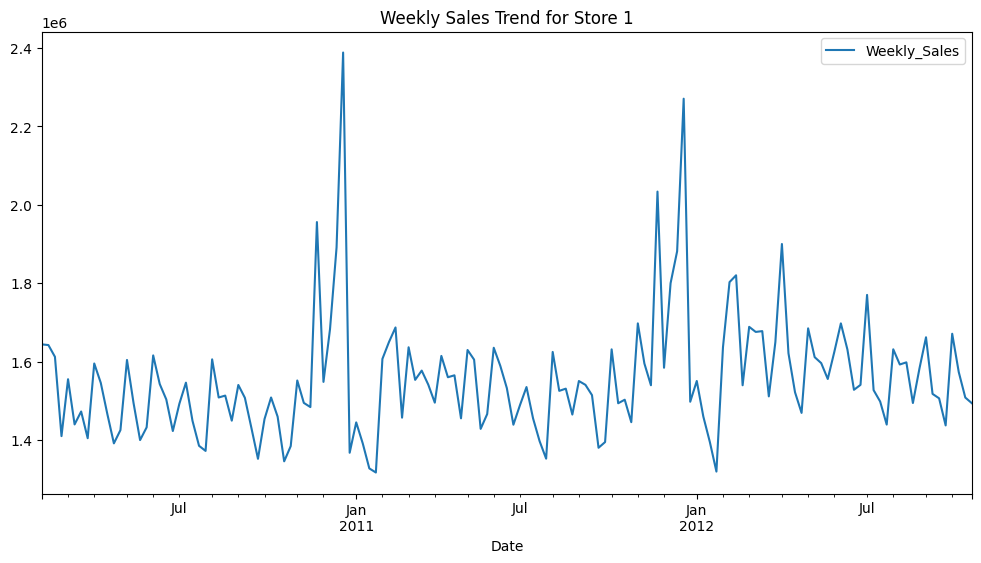

In [17]:
# Sales Trend Analysis: Plot weekly sales over time for a specific store.

# Filter for Store 1 and plot sales trend

store_1 = data[data['Store'] == 1]
store_1.plot(x='Date', y='Weekly_Sales', figsize=(12, 6), title="Weekly Sales Trend for Store 1")
plt.show()

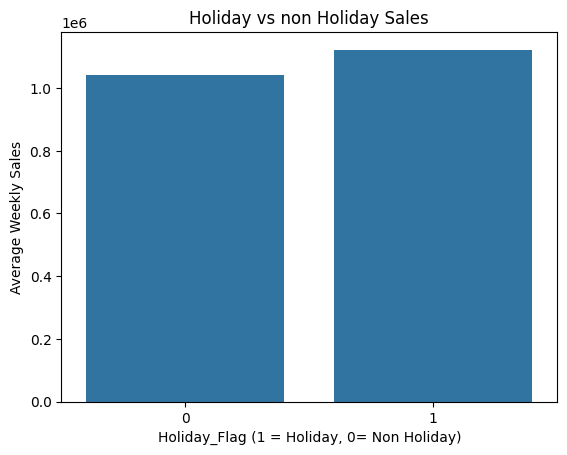

In [18]:
#Impact of Holidays on Sales: Compare average sales during holiday and non-holiday weeks. 

sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Holiday vs non Holiday Sales")
plt.xlabel("Holiday_Flag (1 = Holiday, 0= Non Holiday)")
plt.ylabel("Average Weekly Sales")
plt.show()

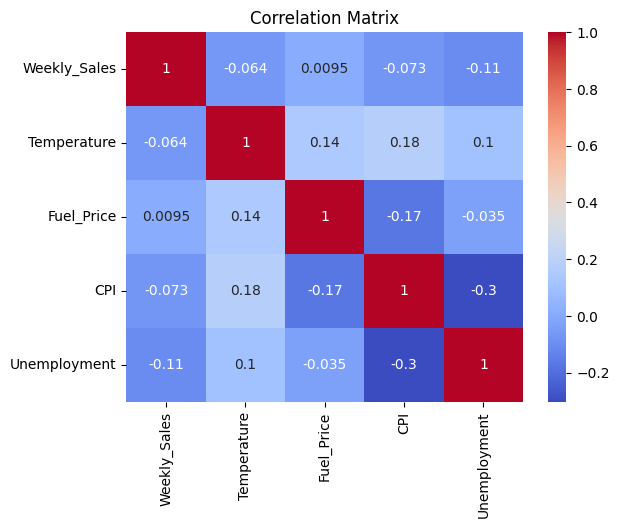

In [19]:
##Correlation Analysis: Analyze the correlation between numerical features like temperature, fuel price, CPI, and unemployment.

#Correlation heatmap

correlation_matrix= data[['Weekly_Sales', 'Temperature', 'Fuel_Price','CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 6: Feature Engineering

In [20]:
## Add new feature

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Week'] = data['Date'].dt.isocalendar().week

In [21]:
print(data.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  Year  Week  
0  211.096358         8.106      2  2010     5  
1  211.242170         8.106      2  2010     6  
2  211.289143         8.106      2  2010     7  
3  211.319643         8.106      2  2010     8  
4  211.350143         8.106      3  2010     9  


Step 7: Hypothesis Testing

In [22]:
##Test if holiday weeks have significantly higher sales than non-holiday weeks.

from scipy.stats import ttest_ind

#Split sales into holiday and non holiday weeks

holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales']

#Perform t-test

t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)
print(f"T-Statistics: {t_stat}, P-Value: {p_value}")

T-Statistics: 2.9608919093259036, P-Value: 0.003078699263818616


Step 8: Predictive Modeling

In [24]:
#Use a regression model to predict weekly sales based on other features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [25]:
# Prepare the data

X = data[['Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment']]
y = data['Weekly_Sales']

In [26]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict on test data
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 475432.53295882524, RMSE: 562631.7724810028


Step 9: Insights and Visualization

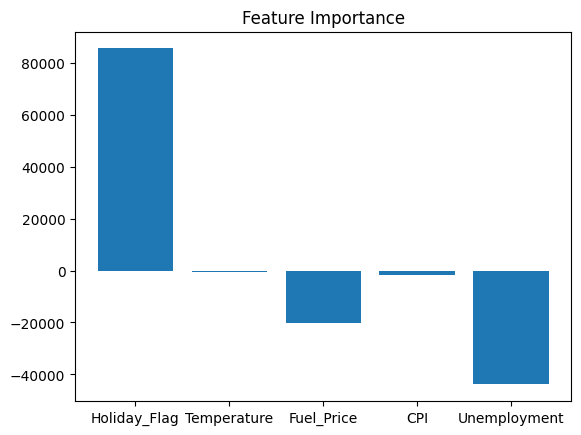

In [30]:
# Feature  importance visulization (for linear regression)

importance = model.coef_
features = X.columns

plt.bar(features, importance)
plt.title("Feature Importance")
plt.show()

Step 10: Conclusion
Summarize findings and provide actionable recommendations:

Which stores perform best?
What drives sales the most?
How do holidays and economic factors influence sales?
